# Exercise 1

Design a machine for protons at a total momentum of 20 GeV/c with the following basic parameters: 

- circumference = 1000 m,
- quadrupole length $L_{q}$ = 3.0 m,
- 8 FODO cells,
- dipole length is 5 m, maximum field is 3 T.

Apply the knowledge from previous lectures at this school and define a lattice cell according to the boundary conditions (position of dipole magnets and quadrupoles) and find the optics (strength of dipoles and quadrupoles) so that $\beta_{max}=\hat{\beta}$ is around 300 m. Implement 
it in MAD-X format using thin lenses for all elements and verify the calculations.

**DISCUSSION**: clearly we would like a periodic machine, that is we need to fill the full circumnfernce with FODO. The FODO lenght is therefore 125 m.

Let's start to consider the dipoles: how many dipoles do we need? I would say to have the same number of dipoles per cell. So we could consider a total of 8, 16, 24, 32 ... dipoles. Let's assume that all dipoles are identical,i.e., they give the same kick (angle $\alpha$) to the beam.
We have to remember that
\begin{equation}
\alpha = \frac{\int_{dipole} B_{dipole}dl}{B\rho}
\end{equation}
therefore 
\begin{equation}
\alpha_{MAX} < \frac{15~\rm{Tm}}{3.3356 \times 20~\rm{Tm}} \approx 0.22~\rm{rad}
\end{equation}

Since we have a circular machine, we need to have
\begin{equation}
\int_{C} d\alpha=2\pi
\end{equation}

So we need at least 29 dipoles. We chose the 32 dipoles for symmetry arguments (4 dipoles per cells).
Now that we defined the geometry of the machine (dipoles) we can focus on the quadrupoles.

We remember that

\begin{equation}
\beta_{MAX} = \frac{2 f_Q \sqrt{4f_Q+L_{cell}}}{{\sqrt{4f_Q-L_{cell}}}}
\end{equation}


In [2]:
#%%
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xtrack as xt
import xobjects as xo
import scipy


In [11]:
lcirc = 1000.0
lquad = 3.0
lbend = 5.0
max_dipole_field = 3.0
number_of_FODO = 8
pc_GeV = 20.0

lFODO = lcirc/number_of_FODO
theta_max = max_dipole_field*lbend/(3.3356*pc_GeV)
min_number_of_dipoles = round((2.0*np.pi)/theta_max)

number_of_dipoles = 32
number_of_dipoles_per_FODO = number_of_dipoles/number_of_FODO

target_bmax = 300.0
def fun(f, L, target):
    return 2*f*np.sqrt(4*f+L)/np.sqrt(4*f-L) - target


f_0 = scipy.optimize.root(fun, 100, args=(lFODO, target_bmax))['x'][0]
f_0

112.88815320319954

Text(0, 0.5, '$\\beta_{MAX}$ [m]')

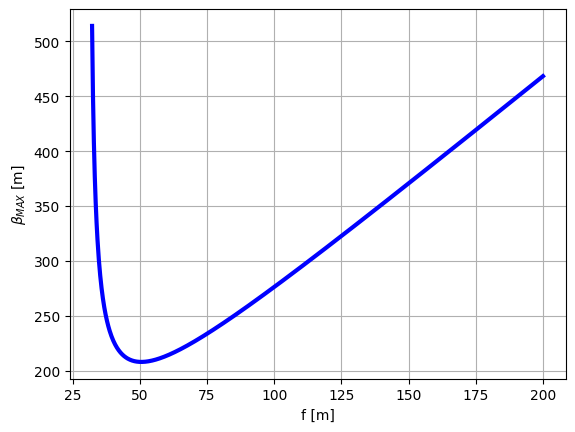

In [12]:
f = np.linspace(125/4+1,200, 1000)
plt.plot(f, fun(f, lFODO, target_bmax)+target_bmax,'b',lw=3)
plt.grid(True)
plt.xlabel('f [m]')
plt.ylabel('$\\beta_{MAX}$ [m]')

In [13]:
k1 = 1.0/f_0/lquad
k1


0.0029527751484545134

In [14]:
env = xt.Environment()
env.vars({'lFODO': lFODO, 
          'lquad': lquad, 
          'lbend': lbend, 
          'k1f': k1, 
          'k1d': -k1,
          'number_of_dipoles': number_of_dipoles,
          'angle.mb': 2.0*np.pi/number_of_dipoles,
          'k0.mb': 'angle.mb/lbend',
          })

lcirc = 1000.0
lquad = 3.0
lbend = 5.0
max_dipole_field = 3.0
number_of_FODO = 8
pc_GeV = 20.0

env.new('mb', xt.Bend, length='lbend', k0='k0.mb', h='k0.mb')
#env.new('mb', xt.Multipole, knl=['k0.mb', 0.0], hxl='k0.mb')
env.new('mq', xt.Quadrupole, length='lquad')

env.new('mq.f', 'mq', k1='k1f')
env.new('mq.d', 'mq', k1='k1d')

cell = env.new_line(components=[
    env.place('mq.f', at=lquad*0.5),
    env.place('mb', at=18.75 + lbend*0.5),
    env.place('mb', at=43.75 + lbend*0.5),
    env.place('mq.d', at=62.5 + lquad*0.5),
    env.place('mb', at=81.25 + lbend*0.5),
    env.place('mb', at=106.25 + lbend*0.5),
    env.new('marker_end', xt.Marker, at=lFODO),

])

cell.to_pandas()

,s,element_type,name,isthick,isreplica,parent_name,iscollective,element
0,0.00,Quadrupole,mq.f,True,False,None,False,"Quadrupole(k1=0.00295, k1s=0, length=3, num_mu..."
1,3.00,Drift,drift_1,True,False,None,False,Drift(length=15.8)
2,18.75,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0393, k1=0, h=0.0393, mode..."
3,23.75,Drift,drift_2,True,False,None,False,Drift(length=20)
4,43.75,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0393, k1=0, h=0.0393, mode..."
5,48.75,Drift,drift_3,True,False,None,False,Drift(length=13.8)
6,62.50,Quadrupole,mq.d,True,False,None,False,"Quadrupole(k1=-0.00295, k1s=0, length=3, num_m..."
7,65.50,Drift,drift_4,True,False,None,False,Drift(length=15.8)
8,81.25,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0393, k1=0, h=0.0393, mode..."
9,86.25,Drift,drift_5,True,False,None,False,Drift(length=20)


In [15]:
cells = env.new_line(components=[
    env.new('start', xt.Marker),
    cell,
    env.new('end', xt.Marker),
])

#%% append in cells number_of_FODO times cell
line = env.new_line(components=[env.place(cell)]*number_of_FODO)

line.to_pandas()

,s,element_type,name,isthick,isreplica,parent_name,iscollective,element
0,0.00,Quadrupole,mq.f,True,False,None,False,"Quadrupole(k1=0.00295, k1s=0, length=3, num_mu..."
1,3.00,Drift,drift_1,True,False,None,False,Drift(length=15.8)
2,18.75,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0393, k1=0, h=0.0393, mode..."
3,23.75,Drift,drift_2,True,False,None,False,Drift(length=20)
4,43.75,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0393, k1=0, h=0.0393, mode..."
...,...,...,...,...,...,...,...,...
100,961.25,Drift,drift_5,True,False,None,False,Drift(length=20)
101,981.25,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0393, k1=0, h=0.0393, mode..."
102,986.25,Drift,drift_6,True,False,None,False,Drift(length=13.8)
103,1000.00,Marker,marker_end,False,False,None,False,Marker(_dummy=0)


In [7]:

line.particle_ref = xt.Particles(p0c=6500e9, #eV
                                 q0=1, mass0=xt.PROTON_MASS_EV)
context = xo.ContextCpu()
line.build_tracker(_context=context)

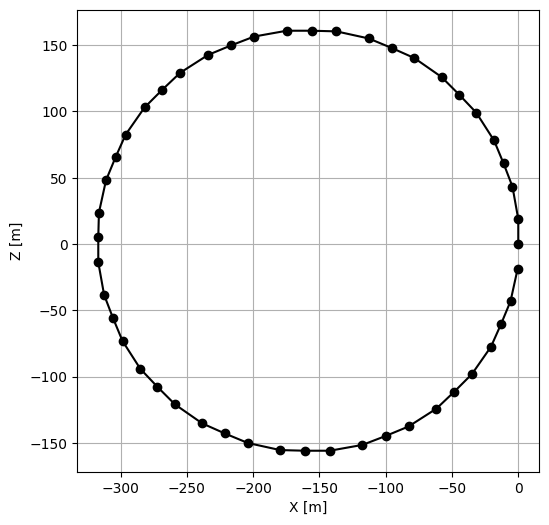

In [8]:

mySurvey = line.survey()
mySurvey = mySurvey.rows[r'^(mq|mb).*']
fig, ax = plt.subplots(figsize=(9, 6))
plt.plot(mySurvey.X, mySurvey.Z, 'o-', label="x", c="k")
plt.axis('square')
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.grid()
# %%
myTwiss= line.twiss(method='4d')

(-0.05, 0.05)

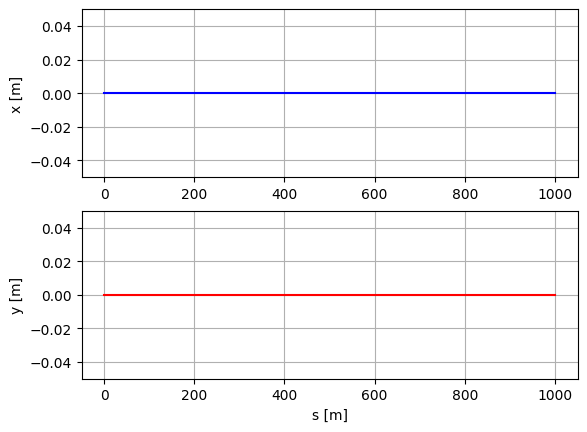

In [9]:

plt.subplot(211)
plt.plot(myTwiss.s,myTwiss.x,'b',label='x')
plt.ylabel('x [m]')
plt.grid()
plt.ylim(-0.05,0.05)

plt.subplot(212)
plt.plot(myTwiss.s,myTwiss.y,'r',label='y')
plt.xlabel('s [m]')
plt.ylabel('y [m]')
plt.grid()
plt.ylim(-0.05,0.05)

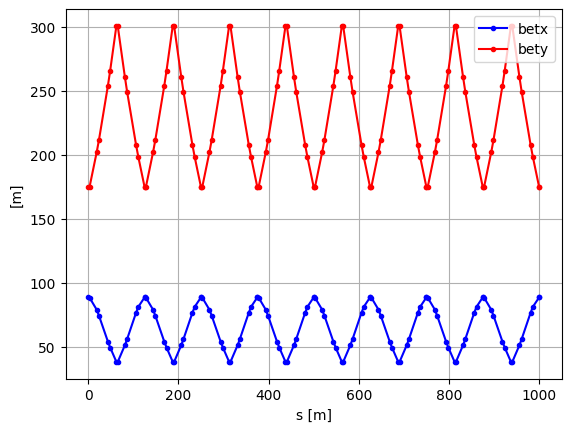

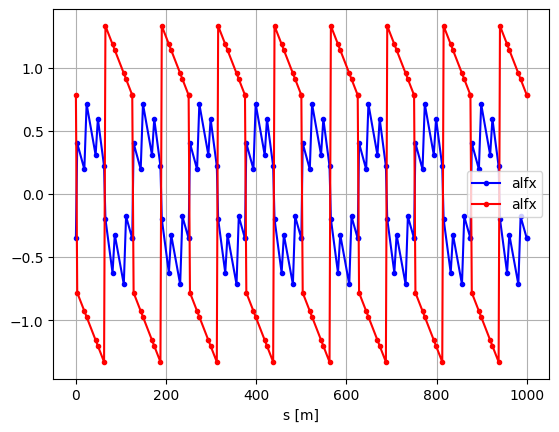

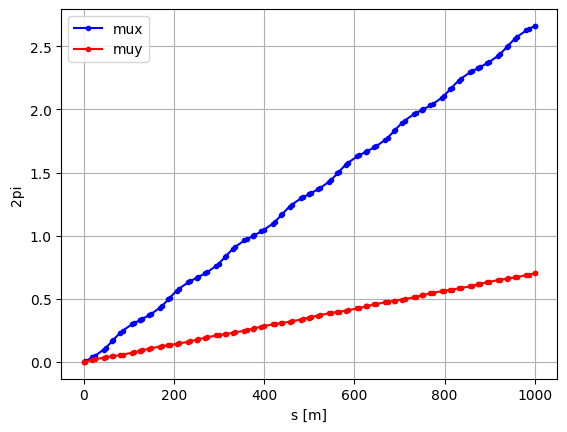

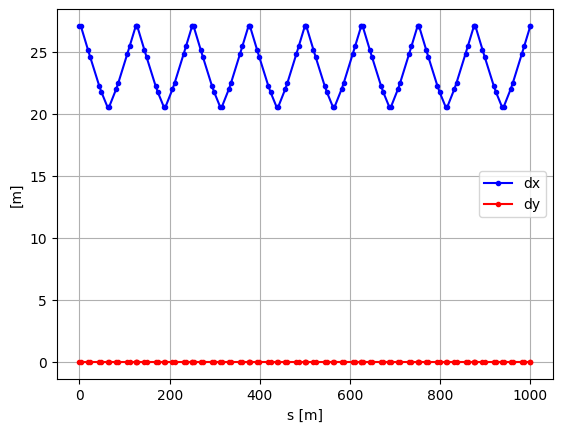

In [10]:

def plot_me(myTwiss):
    plt.plot(myTwiss.s,myTwiss.betx,'.-b', label='betx')
    plt.plot(myTwiss.s,myTwiss.bety,'.-r', label='bety')
    plt.ylabel('[m]')
    plt.xlabel('s [m]')
    plt.grid()
    plt.legend()

    plt.figure()
    plt.plot(myTwiss.s,myTwiss.alfx,'.-b', label='alfx')
    plt.plot(myTwiss.s,myTwiss.alfy,'.-r', label='alfx')
    plt.xlabel('s [m]')
    plt.ylabel('')
    plt.grid()
    plt.legend()

    plt.figure()
    plt.plot(myTwiss.s,myTwiss.mux,'.-b', label='mux')
    plt.plot(myTwiss.s,myTwiss.muy,'.-r', label='muy')
    plt.xlabel('s [m]')
    plt.ylabel('2pi')
    plt.grid()
    plt.legend()

    plt.figure()
    plt.plot(myTwiss.s,myTwiss.dx,'.-b', label='dx')
    plt.plot(myTwiss.s,myTwiss.dy,'.-r', label='dy')
    plt.xlabel('s [m]')
    plt.ylabel('[m]')
    plt.grid()
    plt.legend()
plot_me(myTwiss)
